# Step 1
You need to make:
1 - A non-parametric estimation of PDF in form of histogram \
2 - And using kernel density function for MRV (or probability law in case of discrete MRV).

NOTE:
Conditional mean value(probably step 3) - https://drive.google.com/file/d/1ov6AEweBKgaHlcGUMMMwSYMqox-b9O4X/view
time = 40:00
Variance - 42:00

Data set - https://www.kaggle.com/datasets/mukhazarahmad/nvidia-corporation-shares-data
5 variables, all continuous

Definitions:
    Quantile - inverse function for CDF, cumulative distribution function
    MRV - multivariative random variable - set of random variables


`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res[['High', 'Low', 'Open', 'Close', 'Adj Close']], hist=True, kde=True,


Text(0.5, 0, 'Values of variables')

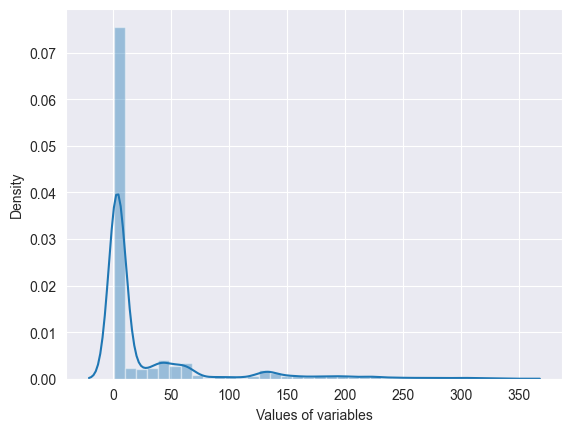

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity


res = pd.read_csv('data/NVIDIA Corporation.csv', header=0, encoding='unicode_escape')
res = res.drop(columns=['Date', 'Volume'])

# seaborn histogram
sns.distplot(res[['High', 'Low', 'Open', 'Close', 'Adj Close']], hist=True, kde=True,
             bins=int(180/5))

plt.xlabel('Values of variables')

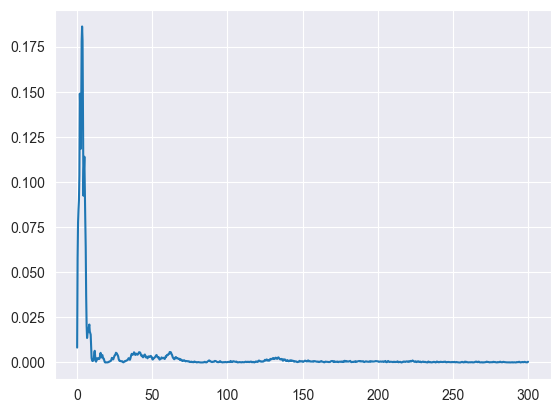

In [19]:
# Estimating the kernel density function KDE for MRV
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(res).reshape(-1, 1))

# Plotting the estimated PDF
x_d = np.linspace(0, 300, 1000)
log_dens = kde.score_samples(x_d[:, None])
plt.plot(x_d, np.exp(log_dens), '-')
plt.show()

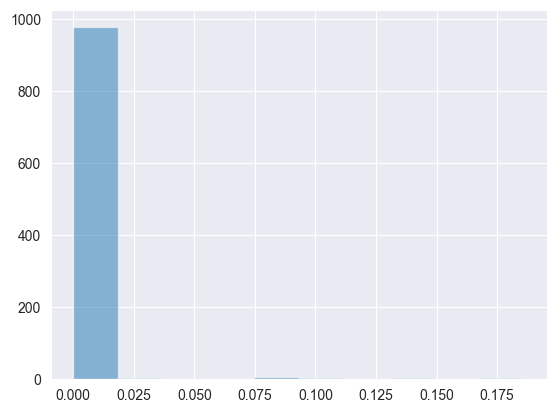

In [20]:
plt.hist(np.exp(log_dens), alpha=0.5)
plt.show()